#  LOGISTIC REGRESSION


1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).
6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 
Detailed deployment instructions are available in the Streamlit Documentation.
https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app 
Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?



### 1. Data Exploration (EDA)

##### 1: Load the Dataset

In [7]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Load the dataset
df = pd.read_csv(r"C:/Users/DELL/Desktop/DATAsets/Titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [11]:
# Summary statistics
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#####  2: Examine Features and Data Types

In [15]:
# Check for missing values
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [17]:
# Check unique values in categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    print(f"{col} unique values: {df[col].unique()}")

Name unique values: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ell

##### 3: Visualizing the Data

In [21]:
#Histogram: To check distribution
#Boxplot: To identify outliers
#Pairplot: To analyze relationships

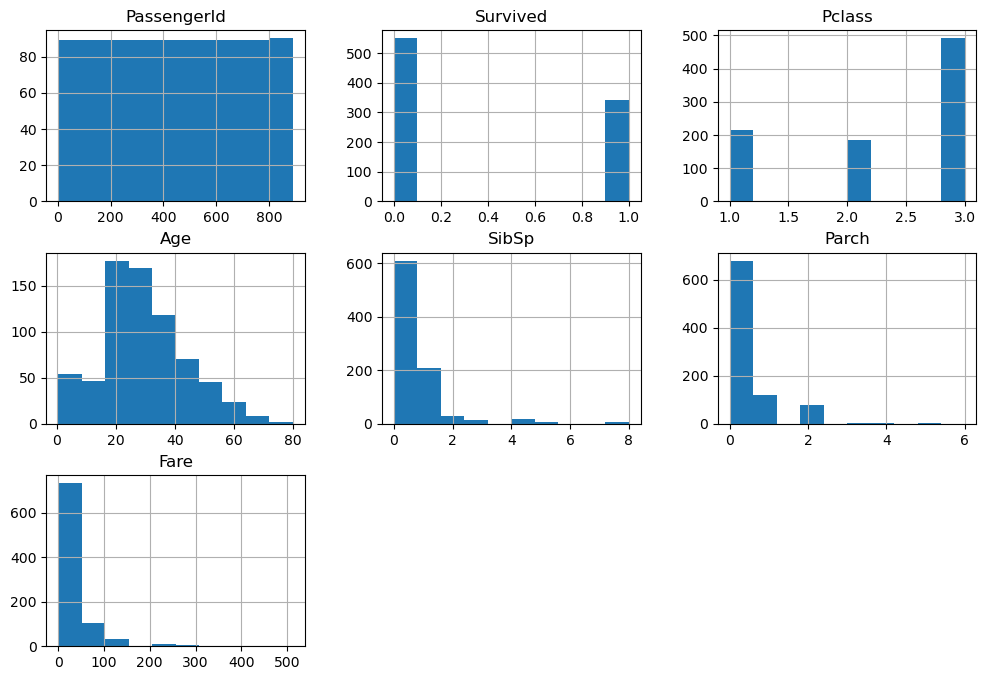

In [23]:
## Histogram of numerical features
df.hist(figsize=(12, 8))
plt.show()

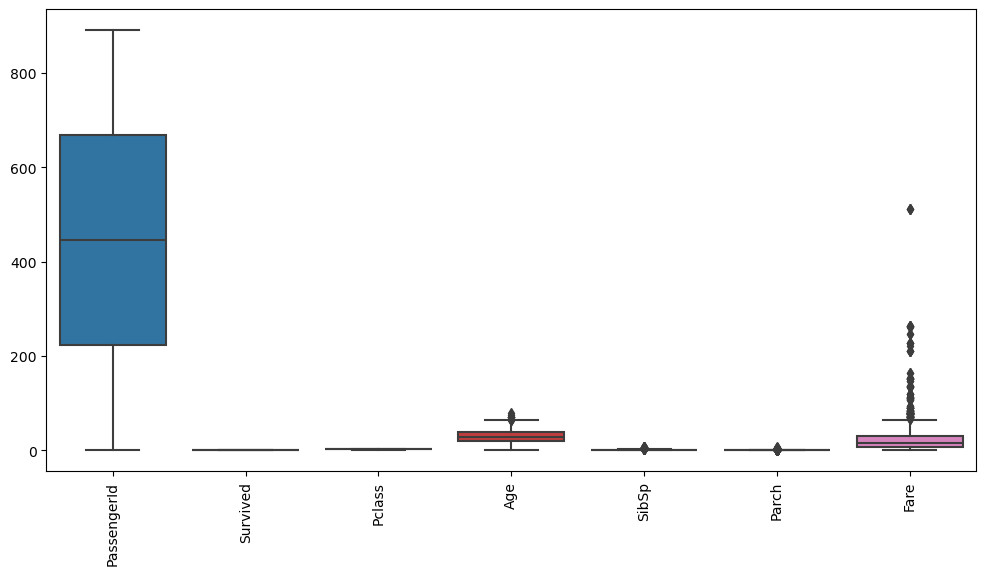

In [25]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [27]:
#It has outliers

### 2. Data Preprocessing

##### Handle Missing Values

In [35]:
# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [37]:
# Fill missing categorical values with mode
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [40]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


#####  Encode Categorical Variables

In [42]:
#Convert categorical variables into numerical format using one-hot encoding or label encoding.

In [46]:
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding for categorical variables
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##### Split Data into Train and Test Sets

In [49]:
from sklearn.model_selection import train_test_split

# Define independent variables (X) and dependent variable (y)
X = df.drop("Survived", axis=1)  # Change "Survived" to the actual target column
y = df["Survived"]

In [55]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [51]:
# Split into training (80%) and testing (20%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train, X_test, y_train, y_test

(     PassengerId  Pclass   Age  SibSp  Parch      Fare  \
 331          332       1  45.5      0      0   28.5000   
 733          734       2  23.0      0      0   13.0000   
 382          383       3  32.0      0      0    7.9250   
 704          705       3  26.0      1      0    7.8542   
 813          814       3   6.0      4      2   31.2750   
 ..           ...     ...   ...    ...    ...       ...   
 106          107       3  21.0      0      0    7.6500   
 270          271       1  28.0      0      0   31.0000   
 860          861       3  41.0      2      0   14.1083   
 435          436       1  14.0      1      2  120.0000   
 102          103       1  21.0      0      1   77.2875   
 
      Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
 331                                 0                                      0   
 733                                 0                                      0   
 382                                 0         

##### Feature Scaling (Optional, but recommended for better performance)

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
X_train

array([[-0.45306593, -1.61413602,  1.25364106, ..., -0.03750293,
        -0.30335547,  0.59248936],
       [ 1.11387354, -0.40055118, -0.47728355, ..., -0.03750293,
        -0.30335547,  0.59248936],
       [-0.25427511,  0.81303367,  0.21508629, ..., -0.03750293,
        -0.30335547,  0.59248936],
       ...,
       [ 1.60890168,  0.81303367,  0.90745614, ..., -0.03750293,
        -0.30335547,  0.59248936],
       [-0.04768856, -1.61413602, -1.1696534 , ..., -0.03750293,
        -0.30335547,  0.59248936],
       [-1.34567573, -1.61413602, -0.63114352, ..., -0.03750293,
        -0.30335547,  0.59248936]])

In [66]:
X_test

array([[ 1.02032491,  0.81303367, -0.09263364, ..., -0.03750293,
        -0.30335547, -1.68779402],
       [-0.03209712, -0.40055118,  0.13815631, ..., -0.03750293,
        -0.30335547,  0.59248936],
       [ 1.53094449,  0.81303367, -0.7080735 , ..., -0.03750293,
        -0.30335547,  0.59248936],
       ...,
       [-1.64581091,  0.81303367,  0.67666619, ..., -0.03750293,
        -0.30335547,  0.59248936],
       [-1.4158372 , -0.40055118, -0.93886345, ..., -0.03750293,
        -0.30335547,  0.59248936],
       [-1.7042788 ,  0.81303367, -1.93895323, ..., -0.03750293,
        -0.30335547,  0.59248936]])

### 3. Model Building

##### Train Logistic Regression Model

In [70]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 4. Model Evaluation

##### Model Predictions

In [74]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

In [76]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [78]:
y_prob

array([0.05649377, 0.05840403, 0.04332213, 0.66276371, 0.96667453,
       0.22030476, 0.33458451, 0.00387282, 0.37697468, 0.75007403,
       0.88369979, 0.0293026 , 0.0381874 , 0.0515298 , 0.05424118,
       0.77186597, 0.1795503 , 0.34335563, 0.06582342, 0.03976749,
       0.03842292, 0.0981147 , 0.25314548, 0.04289464, 0.03831579,
       0.00445035, 0.12548252, 0.06058997, 0.00451584, 0.24094093,
       0.04416579, 0.26315109, 0.16156108, 0.24637915, 0.0418319 ,
       0.05259528, 0.20726962, 0.3320981 , 0.19666449, 0.03782685,
       0.01330418, 0.03251672, 0.03825045, 0.05683607, 0.03022566,
       0.00505507, 0.04061798, 0.03952913, 0.03791819, 0.67166783,
       0.92525734, 0.9199561 , 0.00376406, 0.83022772, 0.03026902,
       0.8214412 , 0.05536059, 0.11590403, 0.34554239, 0.36158128,
       0.04072788, 0.94604094, 0.3585547 , 0.10389263, 0.05344243,
       0.12157338, 0.01634847, 0.03600853, 0.06303706, 0.98780388,
       0.38137293, 0.99390051, 0.30375042, 0.79963586, 0.04129

##### Performance Metrics

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7374301675977654
Precision: 0.9090909090909091
Recall: 0.40540540540540543
F1-Score: 0.5607476635514018
ROC-AUC Score: 0.9042471042471043


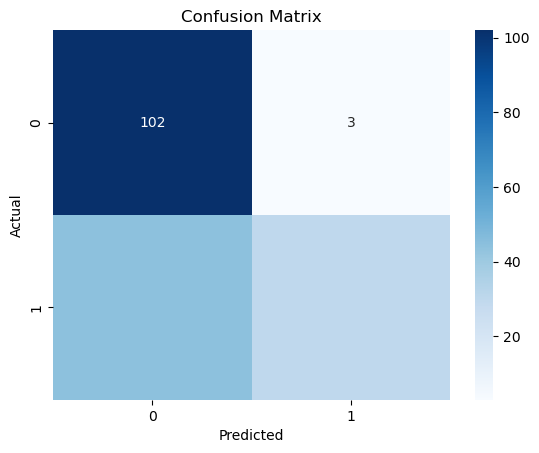

In [83]:
# Confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


##### ROC Curve

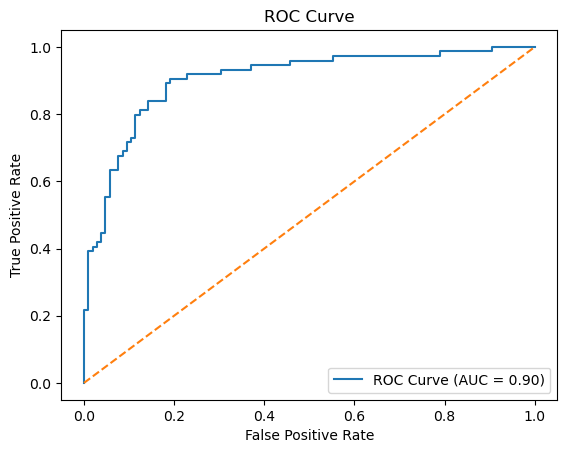

In [86]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

### 5. Interpretation

##### Analyze Model Coefficients

In [92]:
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
coefficients.sort_values(by="Coefficient", ascending=False, inplace=True)
print(coefficients)

                                  Feature  Coefficient
822     Name_Tornquist, Mr. William Henry     0.288273
5                                    Fare     0.278370
14       Name_Albimona, Mr. Nassef Cassem     0.236481
21    Name_Allison, Master. Hudson Trevor     0.235716
213       Name_Dean, Master. Bertram Vere     0.229154
...                                   ...          ...
22      Name_Allison, Miss. Helen Loraine    -0.202610
2                                     Age    -0.211453
1623                        Cabin_B96 B98    -0.321736
1                                  Pclass    -0.431560
896                              Sex_male    -1.033427

[1725 rows x 2 columns]


### 6. Deployment with Streamlit

##### Install Streamlit 

In [96]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


##### Create a app.py File


In [99]:
import streamlit as st
import numpy as np
import pickle

# Load trained model
model = pickle.load(open("logistic_regression_model.pkl", "rb"))

FileNotFoundError: [Errno 2] No such file or directory: 'logistic_regression_model.pkl'

In [101]:
import pickle

# Assuming 'model' is your trained logistic regression model
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [103]:
import os

print("Current Working Directory:", os.getcwd())  # Print the current directory
print("Files in Directory:", os.listdir())  # List files in the directory

Current Working Directory: C:\Users\DELL\ExcelR - Data Science Assignments
Files in Directory: ['.ipynb_checkpoints', 'Assignment 1.ipynb', 'Assignment 10.ipynb', 'Assignment 11.ipynb', 'Assignment 12.ipynb', 'Assignment 13.ipynb', 'Assignment 14.ipynb', 'Assignment 15.ipynb', 'Assignment 16.ipynb', 'Assignment 17.ipynb', 'Assignment 18.ipynb', 'Assignment 19.ipynb', 'Assignment 2.ipynb', 'Assignment 20.ipynb', 'Assignment 3.ipynb', 'Assignment 4.ipynb', 'Assignment 5.ipynb', 'Assignment 6.ipynb', 'Assignment 7.ipynb', 'Assignment 8.ipynb', 'Assignment 9.ipynb', 'Assignment10.ipynb', 'lightgbm_model.pkl', 'lightgbm_submission.csv', 'logistic_regression_model.pkl', 'scaler.pkl', 'tuning_results', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'xgboost_submission.csv']


In [107]:
model_path = r"C:/Users/DELL/Documents/logistic_regression_model.pkl"  # Replace with actual path
model = pickle.load(open(model_path, "rb"))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/DELL/Documents/logistic_regression_model.pkl'